In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Explore data
df = pd.read_csv("../data/raw/reviews.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user          3320 non-null   object
 1   comment_text  2904 non-null   object
 2   rating        3321 non-null   int64 
 3   page_source   3321 non-null   object
dtypes: int64(1), object(3)
memory usage: 103.9+ KB


rating
1     462
2     358
3     637
4     518
5    1346
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of rating'}, xlabel='Rating', ylabel='Comments'>

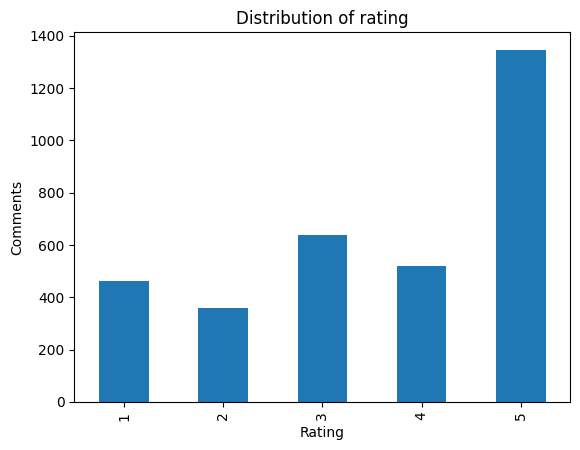

In [2]:
# Visualization
rating_count = df['rating'].value_counts().sort_index()
print(rating_count) 

rating_count.plot(kind='bar', title="Distribution of rating", xlabel="Rating", ylabel="Comments")

<Axes: title={'center': 'Distribution of production_comment'}, xlabel='page_source'>

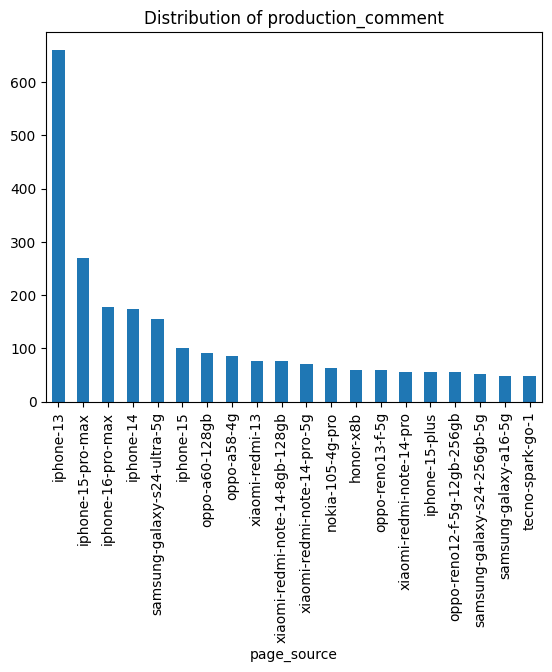

In [5]:
production_comment = df['page_source'].value_counts().head(20)
production_comment.plot(kind = 'bar', title='Distribution of production_comment')

In [6]:
pd.isnull(df).any()
print(df['comment_text'].isna().sum())

417


In [8]:
# Data preprocessing
import sys
import os
import numpy as np
sys.path.append(os.path.abspath(".."))

from utils.clean_data import clean_lines, to_vocab, update_dataset

raw_text = df['comment_text'].fillna("").tolist()
cleaned_text = clean_lines(raw_text)
vocab = to_vocab(cleaned_text)
df['data_proccessed'] = update_dataset(cleaned_text, vocab)

c:\Users\trandai\OneDrive\Documents\AI-PROJECT\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Labeling data for clustering
df['label'] = df['rating'].apply(lambda x: 0 if x <= 3 else 1)

process_link = '../data/processed/reviews_cleaned_labels.csv'
try:
    df.to_csv(process_link, index=False, encoding='utf-8-sig')
except Exception as e:
    print(f"There is an error: {e}")